In [71]:
from pyforest import *

In [72]:
data = pd.read_csv('iris.csv')

In [73]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [76]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [77]:
data = data.drop(['Id'], axis=1)

In [81]:
data['Species']=data['Species'].astype('category')
data['Species']=data['Species'].cat.codes


In [82]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


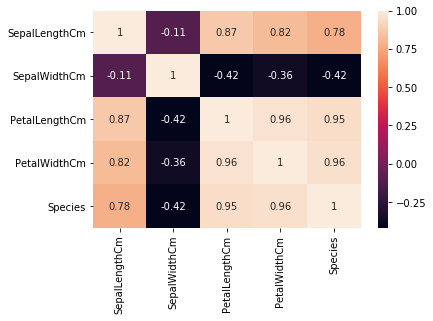

In [83]:
sns.heatmap(data.corr(), annot = True)

In [84]:
features = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [85]:
label = data['Species']

In [86]:
print(data.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
features_train, features_test, label_train, label_test = train_test_split(features,label, test_size = 0.1)

In [89]:
from sklearn.svm import SVC

In [90]:
model = SVC(kernel='linear')

In [91]:
model.fit(features,label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [94]:
label_test.head()

119    2
100    2
109    2
51     1
31     0
Name: Species, dtype: int8

In [92]:
model.predict(features_test)

array([2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1], dtype=int8)

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

In [96]:
print(classification_report(label_test,model.predict(features_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [97]:
print(confusion_matrix(label_test,model.predict(features_test)))

[[5 0 0]
 [0 4 0]
 [0 0 6]]


In [98]:
features_train, features_test, label_train, label_test = train_test_split(features,label, test_size = 0.4)

In [99]:
model.predict(features_test)

array([1, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2,
       2, 2, 0, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2,
       2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 1, 2, 0, 2], dtype=int8)

In [100]:
print(classification_report(label_test,model.predict(features_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.95      0.98        22
           2       0.95      1.00      0.98        21

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [101]:
print(confusion_matrix(label_test,model.predict(features_test)))

[[17  0  0]
 [ 0 21  1]
 [ 0  0 21]]
